In [1]:
import cv2
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt

/var/folders/wv/jd5pny6x6p771_mlxngzr4pc0000gn/T/ipykernel_31376/2918941621.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
os.chdir("/Users/laurin/FUAOS_WS/FUAOS-PROJECT")

In [3]:
# Load the undistorted images
imgL = cv2.imread('./Stereo-Camera-Left/Stereo-Camera-Left-Frame2.jpg', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('./Stereo-Camera-Right/Stereo-Camera-Right-Frame2.jpg', cv2.IMREAD_GRAYSCALE)

Align the undistorted images 

In [10]:
# fix missalignment issue in the undistorted images
# tutorial opencv to undistort the images
# https://docs.opencv.org/master/dc/dbb/tutorial_py_calibration.html
# https://docs.opencv.org/master/dc/dbb/tutorial_py_calibration.html
# gives out projection matrix 
# q is the output 4x4 matrix representing the disparity-to-depth mapping matrix
# https://stackoverflow.com/questions/60889003/stereo-rectification-with-opencv-4-2-0


In [4]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(imgL, cmap='gray')
axes[0].set_title('Left Image')
axes[1].imshow(imgR, cmap='gray')
axes[1].set_title('Right Image')
plt.show()

In [5]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect key points and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(imgL, None)
keypoints2, descriptors2 = sift.detectAndCompute(imgR, None)

In [6]:
# Initialize the Brute-Force Matcher
bf = cv2.BFMatcher()

# Match descriptors
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

In [7]:
# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

In [8]:
# Draw matches
matching_result = cv2.drawMatches(imgL, keypoints1, imgR, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

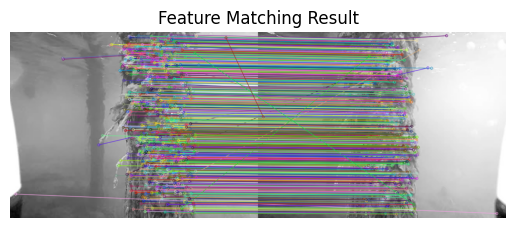

In [10]:
# Show the matching result
plt.imshow(matching_result)
plt.title('Feature Matching Result')
plt.axis('off')  # Hide axis
plt.show()

#also possible to extract disparity map from this results

In [9]:
# Adjust resolution parameters for higher resolution
numDisparities = 64  # Increase for higher resolution
blockSize = 25  # Increase for higher resolution

# Create StereoBM object with adjusted resolution parameters
stereo = cv2.StereoBM_create(numDisparities=numDisparities, blockSize=blockSize)

# Compute disparity map
disparity = stereo.compute(imgL, imgR)

# Display disparity map
plt.imshow(disparity, cmap='gray')
plt.title('Disparity Map')
plt.colorbar()
plt.show()